## 해시테이블- 충돌
- 해시함수 역시 함수이기 때문에 해시함수로 구해진 해시값이 같은 값을 가지는 경우가 존재
- 해시값이 같을 경우 다음과 같은 상황이 발생하는데, 이를 **충돌** 이라고 한다.
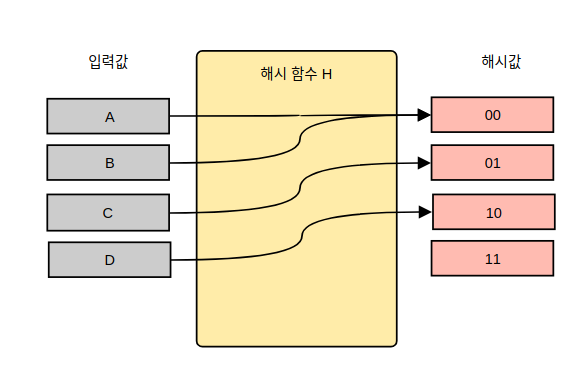

- 본 서적에서는 이러한 해시충돌 발생시의 2가지 처리방식을 소개한다.

### 개별 체이닝 (Separate Chaining)
#### 말 그대로 개별 해시값에 chaining을 하는것으로 다음과 같은 모습이다.
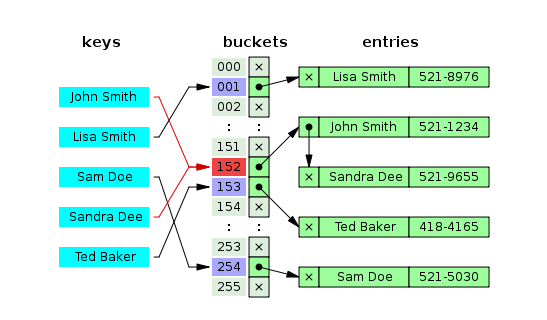

- John Smith 와 Sandra Dee 가 해시함수에 의해 152 라는 같은 값의 해시값을 가지게 되어 충돌이 발생
- 이때 충돌이 발생한  152번 해시값에 그림과 같이 연결리스트를 만드는 방식으로 충돌을 해결하는 방식
- [장점]<br>
    1. 충돌 시 추가 메모리를 사용하여 연결 리스트로 연결하는 방식이기 때문에 테이블의 확장이 필요 없고 간단하게 구현이 가능하다.(미리 많은 공간을 잡아놓을 필요가 없음)
    2. 해시 함수를 선택하는 중요성이 상대적으로 작아진다.(충돌이 발생하여도 연결해주면 되기 때문에)<br>


- [단점]<br>
    1. 데이터가 많아질수록 체이닝된 데이터가 많아진다.=> 한 hash에 자료들이 많이 연결되면 검색 효율이 낮아진다(쏠림 현상)
    2. 최악의 경우(모든 키에 해시충돌이 발생하였을 때) 시간복잡도가 $O(n)$이 되어버린다.


-[참고사항]
- Java8의 해시 테이블은 개별 체이닝을 채택하고 있는데 하나의 해시 버켓에 8 개 이상의 키-값 쌍이 모이면 연결 리스트 구조를 자가 균형 이진 탐색 트리로 개선하는 형태로 사용한다.
- 이와 같이 트리를 사용할 시 get() 메서드의 호출에 대한 기댓값이 $E(N/M)$ 에서 $E(logN/M)$ 으로 성능이 향상된다고 한다.
- 트리구조는 연결리스트보다 메모리 사용량이 많은데, 데이터의 개수가 적으면 연결리스트와 트리구조의 worst case 수행 시간에 차이가 없기 때문에 이런방식을 사용한다.

### 오픈 어드레싱 (Open Addressing)
#### 충돌 발생 시 탐사를 통해 빈 공간을 찾아나서는 방법이기 때문에 해시테이블 크기 이상은 저장할 수 없다.
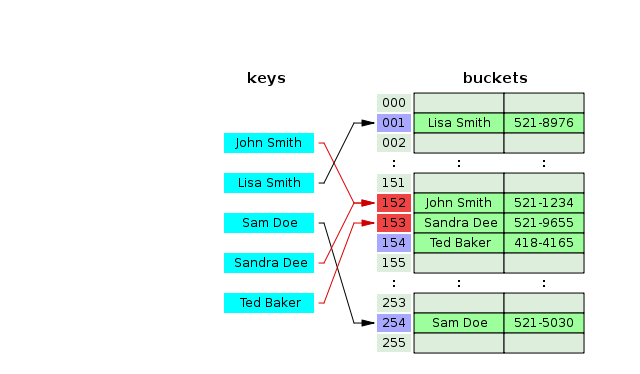

- 이 그림을 예로 들면, John과 Sandra의 해시가 동일하여 충돌이 일어났고, 이때 Sandra는 바로 다음인 153 hash에 값을 저장하였다.
- 그 다음 Ted가 테이블에 저장하려했지만 153에 이미 값이 있어 다음 비어있는 값인 154 hash에 값을 저장한 것이다.

#### 빈공간을 찾아나가는 방법 또한 여러가지가 존재한다.

#### 1. 선형탐색
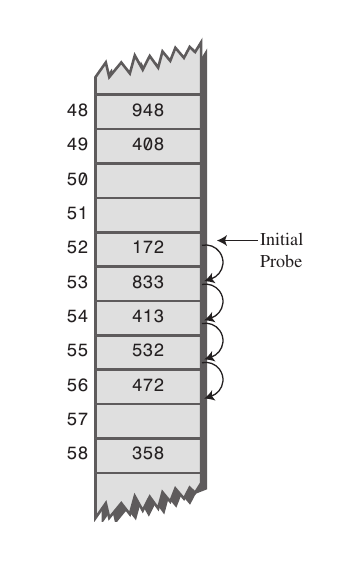
- 해당 해시값에서 고정폭(+n)을 건너 뛰어있는 해시에 저장
- 단, 특정 해시값 주변 버킷이 모두 채워져 있는 Primary Clustring * 문제에 취약 ( 사진의 경우 4번의 탐색과정이나 거쳐야함)

* 조심해야할 것
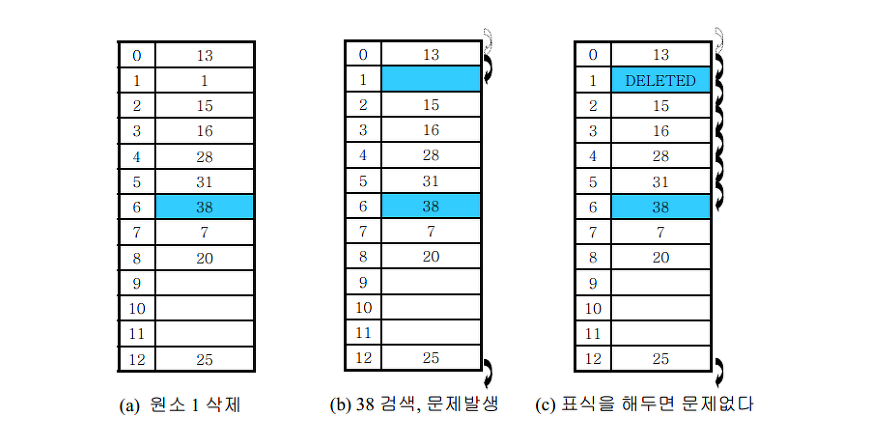

선형조사에서의 삭제로 (a)에서 1을 삭제하면 (b)에서 38을 삽입할때 1의 자리를 검사하여 없는 자리인 줄 알고 38을 1의 자리에 삽입할 수 있다. 이러면 삽입의 순서가 뒤틀리게 된다. 그리하여 삭제할 경우 그 자리에 DELETED 라는 상수값을 저장하여 삭제된 자리라는 것을 표시하여야 한다.

#### 2. 제곱탐색
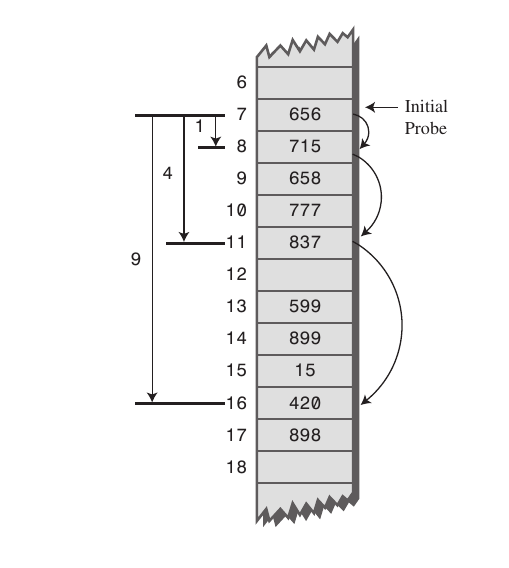
- 충돌이 일어난 해시의 제곱을 한 해시에 데이터를 저장 ( 1-> 4 -> 9 )
- 단, 여러 개의 서로 다른 키들이 동일한 초기 해시값( 위의 사진에서 initial probe)을 갖는 Secondary Clustring 문제에 취약
- 초기 해시값이 같으면 동일한 폭으로 탐색하기 때문에 효율성이 떨어짐.

문제점: 위에서도 알 수 있듯이 클러스터링 문제에 취약하다. 해시 테이블에 저장되는 데이터들이 고르게 분포되지 않고 뭉치게 되면서 해시 테이블의 특정 위치에는 데이터가 몰리게 되고, 다른 위치에는 상대적으로 데이터가 거의 없는 상태가 될 수 있다.

또한 함수 자체의 슈도코드를 보더라도 알 수 있지만 버킷 사이즈보다 큰 경우 삽입할 수 없다는 단점 역시 존재한다.
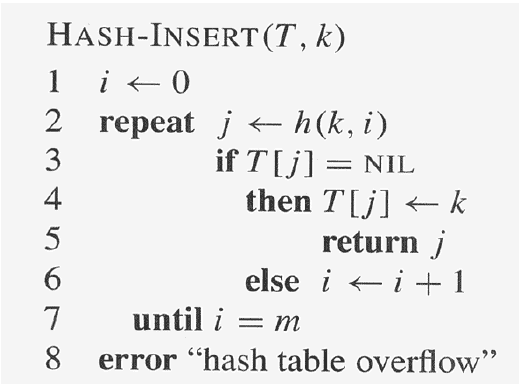
따라서 로드팩터 기준( 파이썬은 0.66, 루비는 0.5 등등)을 넘어서면 더 큰 크기의 또 다른 버킷을 생성한 후 여기에 새롭게 복사하는 Rehashing 작업이 일어난다. 늘어난 해시 테이블의 크기에 맞추어 테이블 내의 모든 데이터를 다시 해싱함으로써 평균 탐색, 삽입, 삭제 시간을 낮추어 성능저하를 막는 것이다.

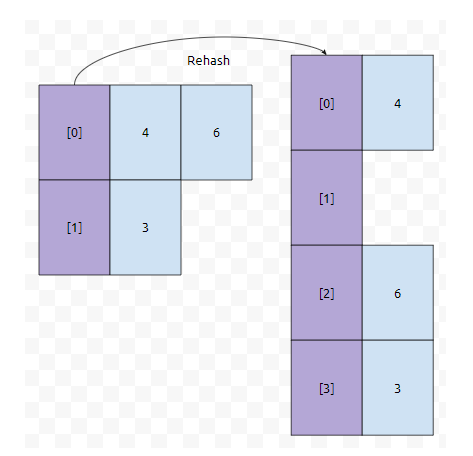

## 언어별 해시테이블 구현방식
파이썬에서 가장 흔하게 쓰이는 자료형 中 하나인 딕셔너리가 해시 테이블로 구성되어있다.
또한, 앞서 스터디에서 파이썬에서 연결리스트를 만들기 위해서는 추가 메모리 할당이 필요할 뿐더러 이는 상대적으로 느린 방법에 속하므로 체이닝 방식의 구현이 어려운 것을 몸소 느꼈기에 당연히 오픈 어드레싱 방식으로 출돌방지가 구현되어있다는 것을 짐작 가능.
<br>
**(정확한 이유: 체이닝 시 malloc으로 메모리를 할당하는 오버헤드가 높아 오픈 어드레싱을 택함)**


malloc :동적으로 메모리를 할당하는 함수 <br>
overhead: 어떤 처리를 하기 위해 들어가는 간접적인 처리 시간 · 메모리

최근의 언어들 (루비, 파이썬) 에서는 오픈 어드레싱 방식을 택해 성능을 높히고, 단점을 극복하기 위해 로드 팩터를 작게 잡아 성능 저하 문제를 해결하는 모습을 보이고 있다.
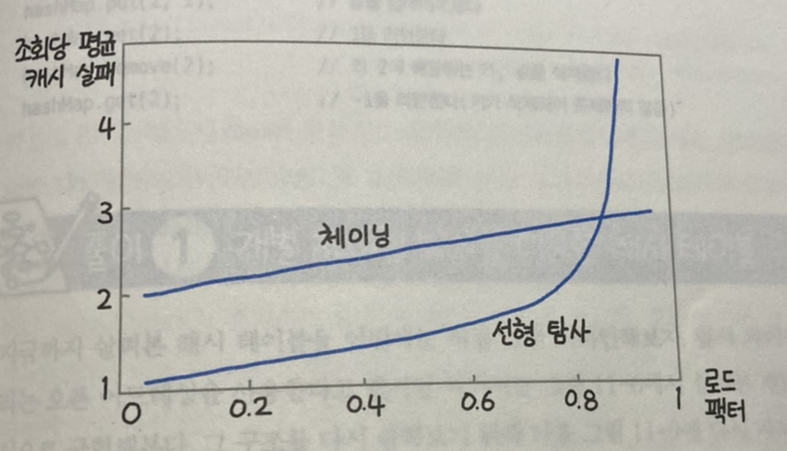
